# Finding Nemo

**Build an image classifier**

1.  Chop up the image into slices of 224x224 pixels
2.  Predict labels using a pre-trained network (e.g. MobileNet)
3.  Collect labels / predictions for all slices
4.  Filter out predictions that are below a certain probability threshold
5.  Analyze the results

In [26]:
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np

#### Let's use Keras' image module to load and manipulate images!

**Note**, there are many ways to read in images in python; for example:
- `matplotlib.pyplot.plt.imread()`
- `cv2.imread()`
- `tensorflow.keras.preprocessing.image.load_img()`
- `PIL.Image.open()`
 
Pick whichever method works for you! The most important thing at the end of the day is that we can work with the image as an array.

In [3]:
from tensorflow.keras.preprocessing import image
img = image.load_img('aquarium.jpg')

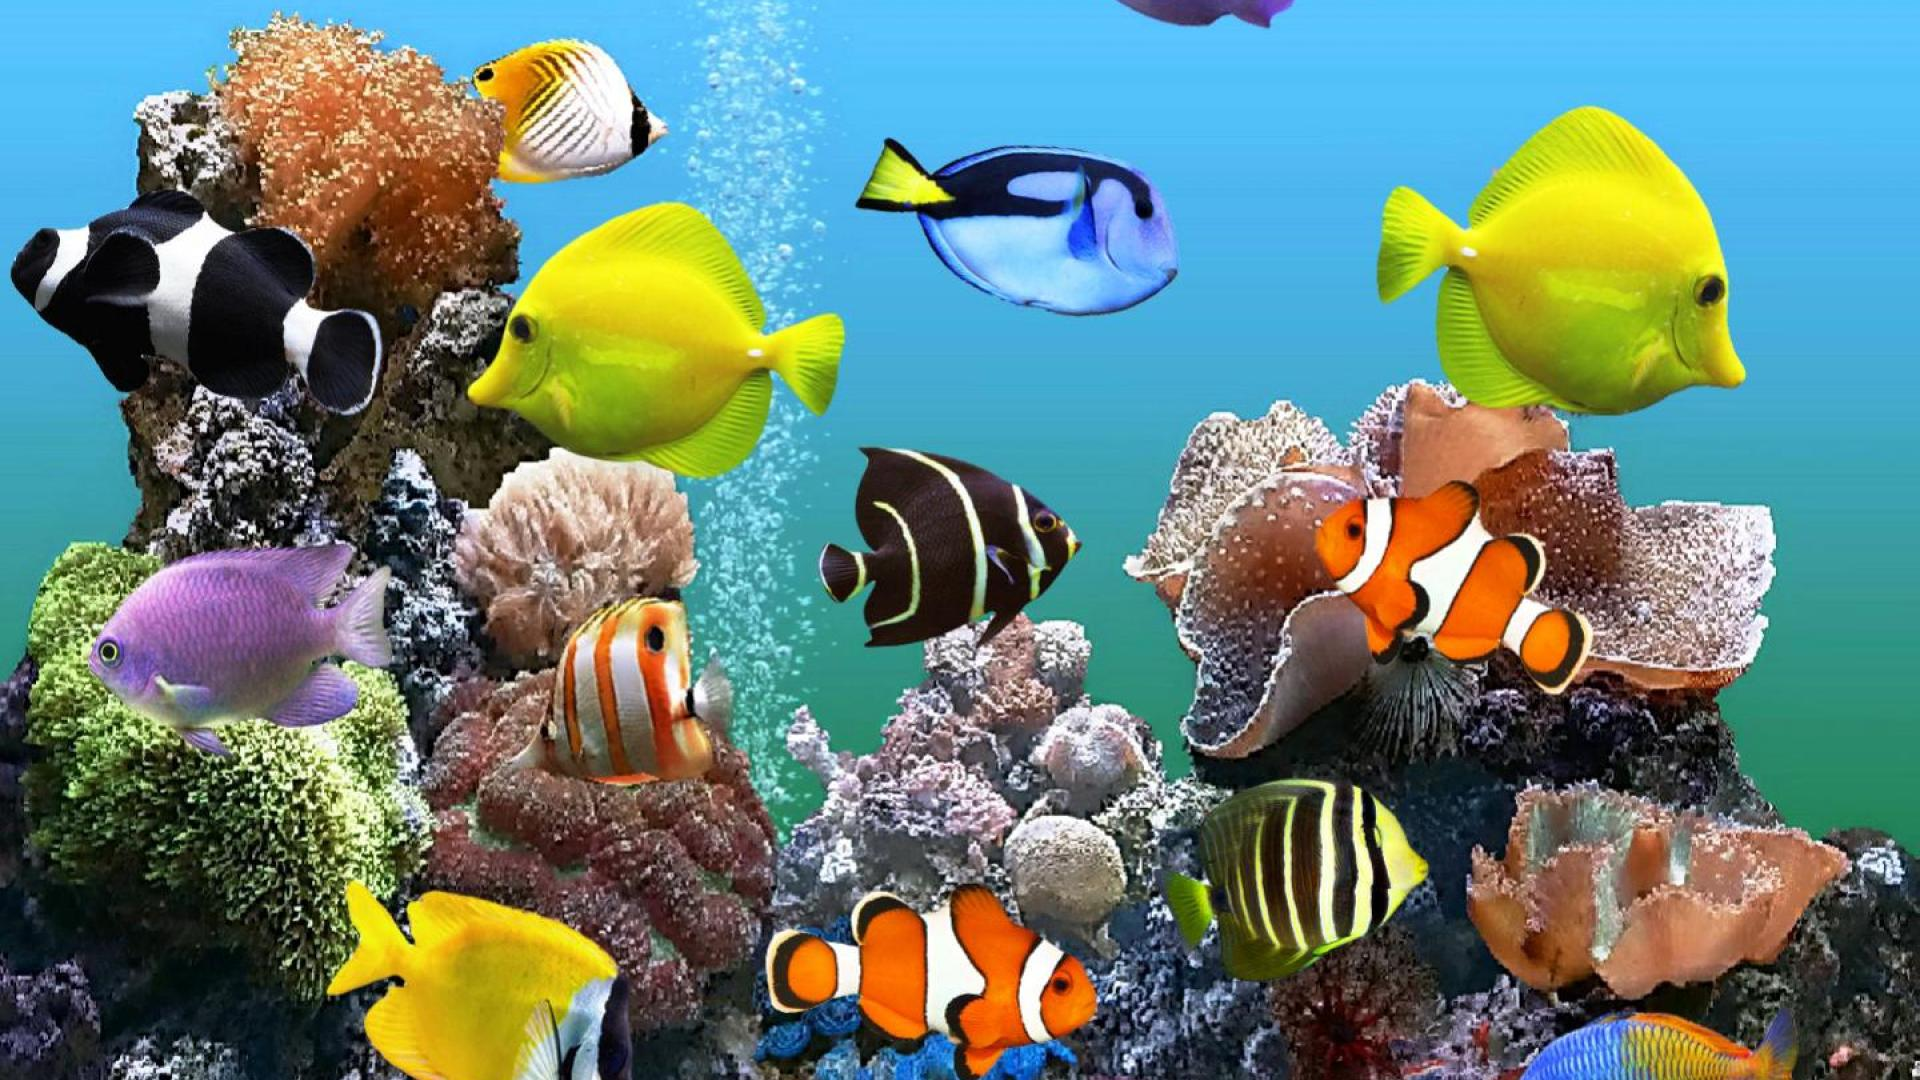

In [4]:
img

### Convert the image to an array, and check out some of the properties.

In [63]:
img_array = image.img_to_array(img).astype(np.uint8)

In [64]:
img_array.shape

(1080, 1920, 3)

### Extract a single 1x224x224x3 slice of the image
- Those are the dimensions of the images from the ImageNet data set (on which many popular models were trained, e.g. VGG, MobileNet)

In [65]:
fish = img_array[856:1080, 900:1124, :]

In [29]:
fish.shape

(224, 224, 3)

In [67]:
fish = np.expand_dims(fish, axis=0) #to add the extra "1" dimension

### Create a prediction from the image slice
- We're going to use MobileNet since it's small and works decently well out-of-the-box.
- There are others you can check out:
    - https://www.tensorflow.org/api_docs/python/tf/keras/applications
    - **Warning!** Check out the sizes of some of the pre-trained models:
        - https://keras.io/api/applications/
        - some larger models could crash your Jupyter Notebook if you don't have enough memory.
    

In [13]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions

### ------ other models you can try out ------ ###
# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.applications.vgg16 import VGG16

In [14]:
model = MobileNetV2(weights='imagenet', include_top=True)

14540800/14536120 [==============================] - 6s 0us/step


In [16]:
model.summary()

ise[0][0]          
__________________________________________________________________________________________________
block_6_depthwise_relu (ReLU)   (None, 14, 14, 192)  0           block_6_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_6_project (Conv2D)        (None, 14, 14, 64)   12288       block_6_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_6_project_BN (BatchNormal (None, 14, 14, 64)   256         block_6_project[0][0]            
__________________________________________________________________________________________________
block_7_expand (Conv2D)         (None, 14, 14, 384)  24576       block_6_project_BN[0][0]         
__________________________________________________________________________________________________
block_7_expand_BN (BatchNormali (None, 14, 14, 384)  1536        block_7_expand[0][0]    

In [32]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
           metrics=['accuracy'])

In [71]:
predictions = model.predict(fish)

In [72]:
decode_predictions(predictions)

[[('n03938244', 'pillow', 0.5865226),
  ('n04209239', 'shower_curtain', 0.21245681),
  ('n03485794', 'handkerchief', 0.024120003),
  ('n04591157', 'Windsor_tie', 0.019550808),
  ('n02834397', 'bib', 0.00897784)]]

In [89]:
plt.imshow(fish, interpolation='nearest')
plt.show()

TypeError: Invalid shape (1, 224, 224, 3) for image data

array([[[[ 86., 197., 253.],
         [ 86., 197., 253.],
         [ 86., 197., 253.],
         ...,
         [ 90., 195., 253.],
         [ 90., 195., 253.],
         [ 90., 195., 253.]],

        [[ 86., 197., 253.],
         [ 86., 197., 253.],
         [ 86., 197., 253.],
         ...,
         [ 90., 195., 253.],
         [ 90., 195., 253.],
         [ 90., 195., 253.]],

        [[ 86., 197., 253.],
         [ 86., 197., 253.],
         [ 86., 197., 253.],
         ...,
         [ 92., 197., 255.],
         [ 92., 197., 255.],
         [ 92., 197., 255.]],

        ...,

        [[ 77., 180., 238.],
         [ 77., 180., 238.],
         [ 77., 180., 238.],
         ...,
         [ 28.,  28.,  20.],
         [ 30.,  29.,  24.],
         [ 33.,  32.,  27.]],

        [[ 75., 178., 236.],
         [ 75., 178., 236.],
         [ 75., 178., 236.],
         ...,
         [ 31.,  30.,  25.],
         [ 35.,  34.,  29.],
         [ 36.,  35.,  30.]],

        [[ 74., 177., 236.],
       

### Collect multiple slices / "tiles" by looping over the image.

In [56]:
tiles = []

for x in range(0, 1920, 224):
    
    for y in range(0, 1080, 224):
        
        tile = img_array[y:y+224, x:x+224, :]
        
        if tile.shape == (224, 224, 3):
            
            tiles.append(tile)

In [57]:
tiles

loat32),
 array([[[253., 246., 254.],
         [255., 248., 255.],
         [255., 248., 255.],
         ...,
         [ 46., 143., 126.],
         [ 46., 143., 126.],
         [ 48., 142., 126.]],
 
        [[251., 246., 253.],
         [255., 246., 254.],
         [254., 249., 255.],
         ...,
         [ 46., 143., 126.],
         [ 46., 143., 126.],
         [ 48., 142., 126.]],
 
        [[247., 244., 251.],
         [253., 246., 253.],
         [251., 248., 255.],
         ...,
         [ 46., 143., 126.],
         [ 46., 143., 126.],
         [ 48., 142., 126.]],
 
        ...,
 
        [[ 50.,  36.,  36.],
         [ 58.,  46.,  46.],
         [ 88.,  74.,  74.],
         ...,
         [168., 158., 133.],
         [160., 150., 125.],
         [153., 146., 127.]],
 
        [[ 52.,  38.,  38.],
         [ 59.,  47.,  47.],
         [ 91.,  77.,  77.],
         ...,
         [193., 182., 154.],
         [182., 171., 143.],
         [174., 166., 143.]],
 
        [[ 69.,  55.,

In [55]:
print(list(range(0,10,2)))

[0, 2, 4, 6, 8]


### Use the pre-trained model to make predictions on the collected image tiles

In [58]:
tiles = np.array(tiles)

In [73]:
results = decode_predictions(model.predict(tiles))

### Collect labels with the highest probabilty.

In [90]:
results[[0,1][0,1]]

TypeError: list indices must be integers or slices, not tuple

### Discuss the results of this manual image recognition system.
- What are some of the reasons why we still get weird results?
- What could we do to improve the model?
